In [9]:
# 삼성 주가 및 항셍,나스닥, 니케이, 코스피, 필라델피아 반도체 지수
import yfinance as yf
import pandas as pd
import FinanceDataReader as fdr
import pandas_datareader as pdr

# 2018-12-25~2021-12-31까지 지수 호출
kospi_index = yf.download(['^KS11'],start = '1995-01-01',end='2022-04-01')['Adj Close']
samsung_whole_index= yf.download(['005930.KS'],start = '1996-01-01',end='2021-12-31')['Adj Close']
samsung_corona_index = yf.download(['005930.KS'],start = '2019-01-01',end='2021-12-31')['Adj Close']

samsung_now_index= yf.download(['005930.KS'],start = '2022-01-01',end='2022-04-01')['Adj Close']

samsung_whole_index

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Date
2000-01-04     4623.468750
2000-01-05     4222.413574
2000-01-06     4252.683105
2000-01-07     4192.145508
2000-01-10     4366.187500
                  ...     
2021-12-24    79241.460938
2021-12-27    78946.156250
2021-12-28    79044.593750
2021-12-29    77918.328125
2021-12-30    77423.921875
Name: Adj Close, Length: 5528, dtype: float64

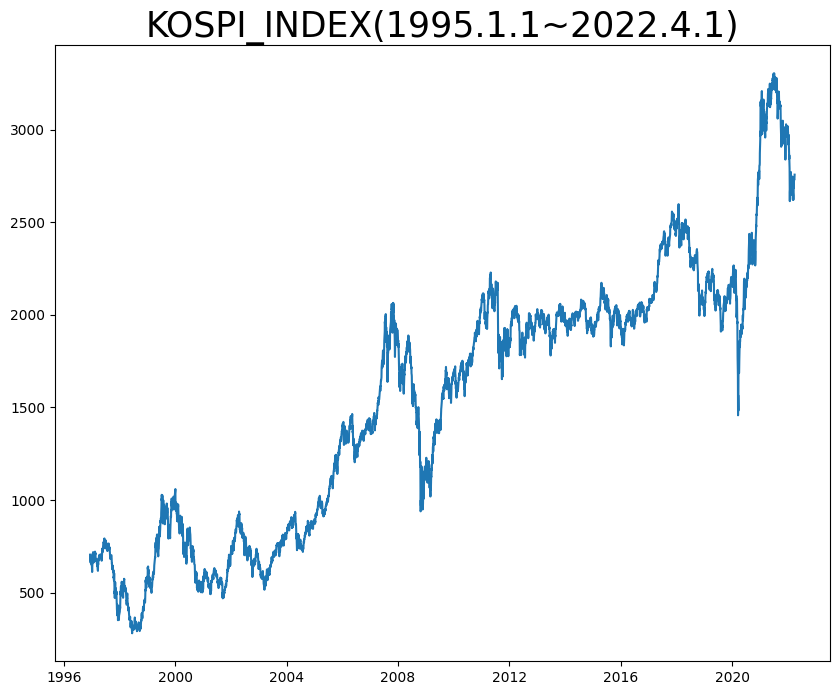

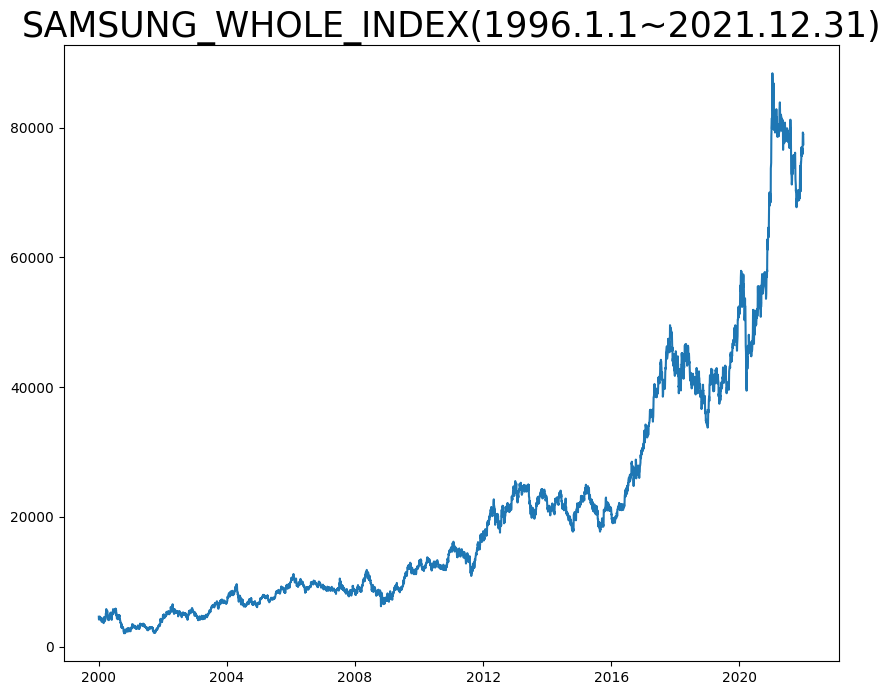

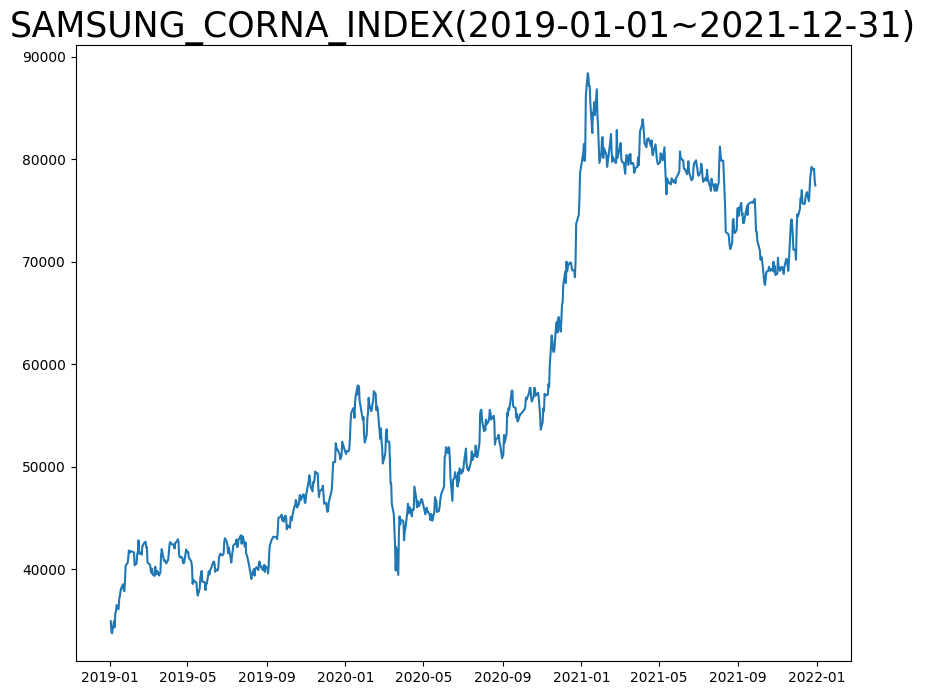

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(kospi_index)
plt.title('KOSPI_INDEX(1995.1.1~2022.4.1)',fontsize=25)
plt.show()

plt.figure(figsize=(10,8))
plt.plot(samsung_whole_index)
plt.title('SAMSUNG_WHOLE_INDEX(1996.1.1~2021.12.31)',fontsize=25)
plt.show()

plt.figure(figsize=(10,8))
plt.plot(samsung_corona_index)
plt.title('SAMSUNG_CORNA_INDEX(2019-01-01~2021-12-31)',fontsize=25)
plt.show()

In [11]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import numpy as np

kospi_index = yf.download(['^KS11'],start = '1995-1-1',end='2022-04-01')['Adj Close']
samsung_whole_index= yf.download(['005930.KS'],start = '1996-01-01',end='2021-12-31')['Adj Close']
samsung_corona_index = yf.download(['005930.KS'],start = '2019-01-01',end='2021-12-31')['Adj Close']


# 로그 데이터 스케일링
log_kospi = np.log(kospi_index)
log_whole_samsung = np.log(samsung_whole_index)
log_corona_samsung = np.log(samsung_corona_index)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


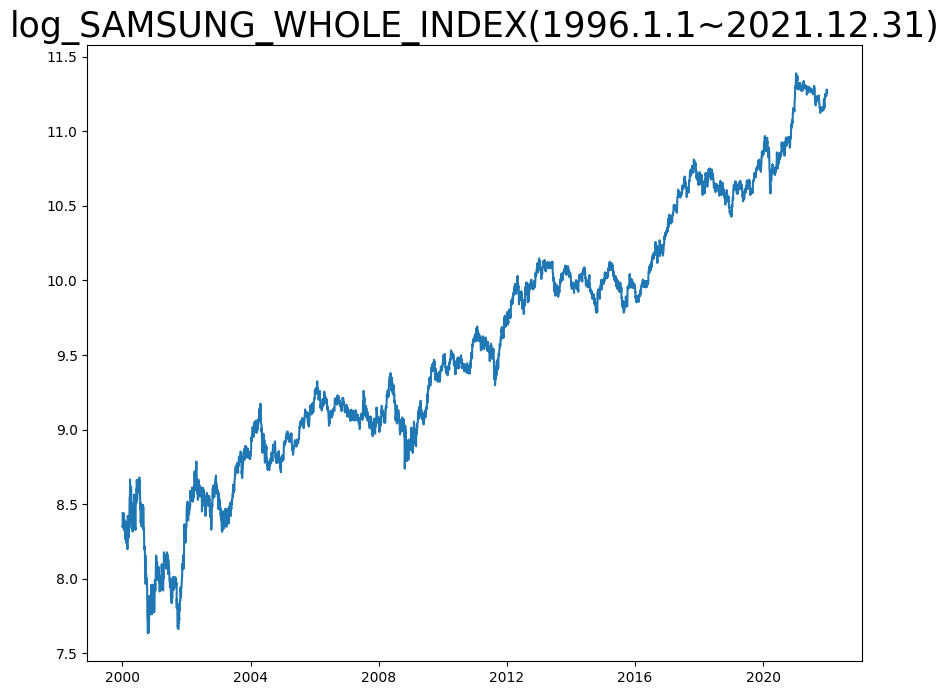

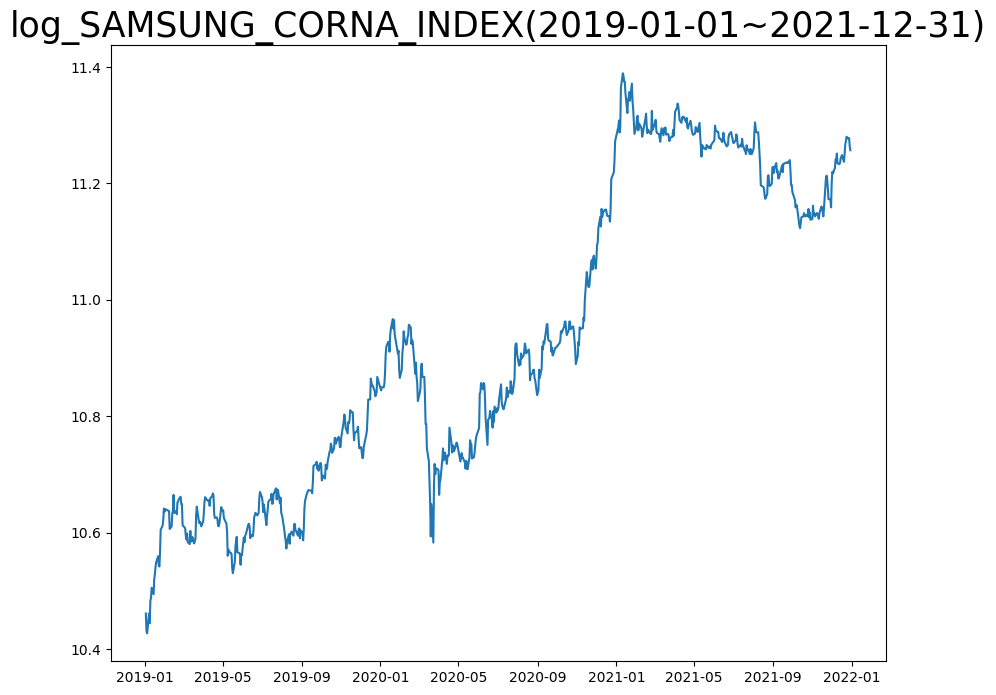

In [12]:
import matplotlib.pyplot as plt

# 로그 스케일링 데이터 시각화


plt.figure(figsize=(10,8))
plt.plot(log_whole_samsung)
plt.title('log_SAMSUNG_WHOLE_INDEX(1996.1.1~2021.12.31)',fontsize=25)
plt.show()

plt.figure(figsize=(10,8))
plt.plot(log_corona_samsung)
plt.title('log_SAMSUNG_CORNA_INDEX(2019-01-01~2021-12-31)',fontsize=25)
plt.show()

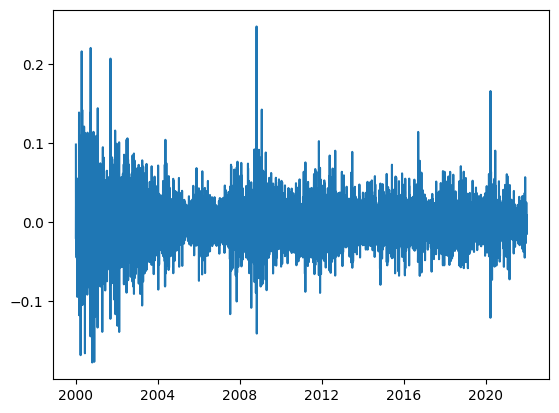

In [13]:
# 로그 이후에도 경향성을 보이기에 1차, 2차 차분 진행
diff_log_whole_samsung = log_whole_samsung.diff(1).dropna()
diff2_log_whole_samsung = diff_log_whole_samsung.diff(1).dropna()
# log_whole_samsung = np.log(samsung_whole_index)


diff_log_corona_samsung = log_corona_samsung.diff(1).dropna()
diff2_log_corona_samsung = diff_log_corona_samsung.diff(1).dropna()
# log_corona_samsung = np.log(samsung_corona_index)

plt.plot(diff2_log_whole_samsung)

In [14]:
from statsmodels.tsa.stattools import kpss

def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""} stationary')

In [15]:
# 스케일 및 차분 데이터의 정상성 확인

print(kpss_test(diff_log_whole_samsung))
print(kpss_test(diff2_log_whole_samsung))

print('\n\n\n\n')
print(kpss_test(diff_log_corona_samsung))
print(kpss_test(diff2_log_corona_samsung))

# 1차 차분 데이터에 대해서 분석 진행

KPSS Statistic: 0.05486909912219894
p-value: 0.1
num lags: 22
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is  stationary
None
KPSS Statistic: 0.30732726648700187
p-value: 0.1
num lags: 1697
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is  stationary
None





KPSS Statistic: 0.07516396281112969
p-value: 0.1
num lags: 2
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is  stationary
None
KPSS Statistic: 0.20382891013421253
p-value: 0.1
num lags: 155
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is  stationary
None


c:\Users\junebae\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
c:\Users\junebae\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
c:\Users\junebae\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
c:\Users\junebae\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:2022: Interpolatio

c:\Users\junebae\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


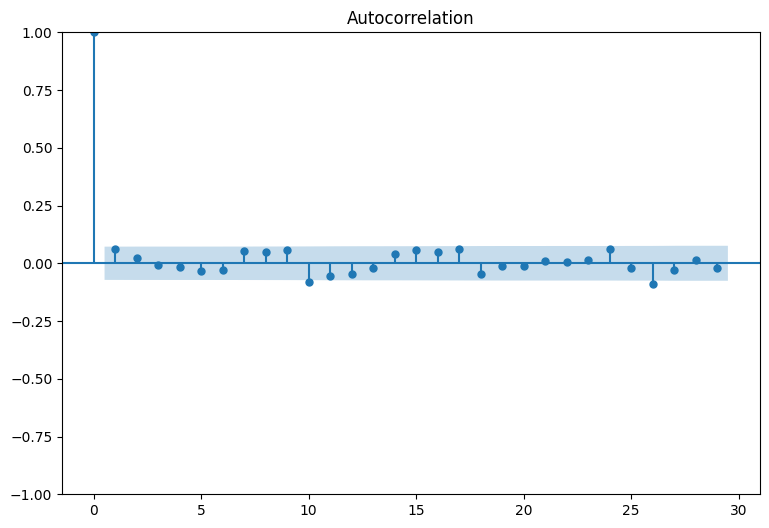

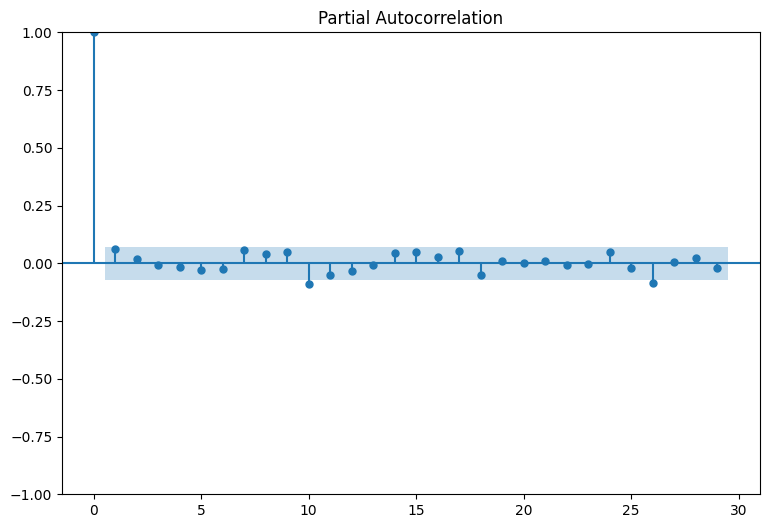

In [16]:
# 삼성전자 초반부터 2021년 말까지 데이터


from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams['figure.figsize'] = [9, 6]
plot_acf(samsung_corona_index.diff(1).dropna())
plot_pacf(samsung_corona_index.diff(1).dropna())
plt.show()




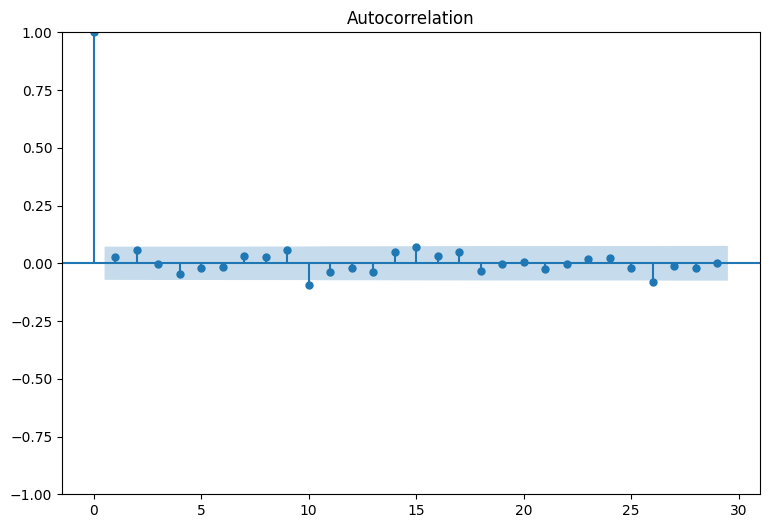

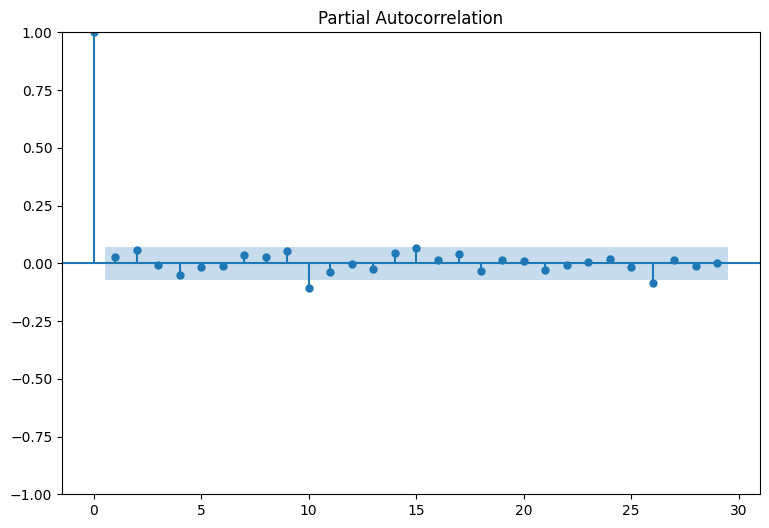

In [17]:
# 삼성전자 코로나 시기 데이터

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams['figure.figsize'] = [9, 6]
plot_acf(diff_log_corona_samsung)
plot_pacf(diff_log_corona_samsung)
plt.show()


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pmdarima.arima import ndiffs
import pmdarima as pm

In [19]:
model = pm.auto_arima(y=log_corona_samsung,
             d = 1,
             start_p=0,
             max_p=3,
             start_q=0,
             max_q=3,
             seasonal=False,
             stepwise=True,
             trace=True
             )


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3960.384, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3958.858, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3958.808, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3959.316, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3957.483, Time=0.21 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.567 seconds


In [20]:
# 2018-12-25~2021-12-31까지 지수 호출
kospi_index = yf.download(['^KS11'],start = '1995-01-01',end='2022-04-01')['Adj Close']
samsung_whole_index= yf.download(['005930.KS'],start = '1996-01-01',end='2021-12-31')['Adj Close']
samsung_corona_index = yf.download(['005930.KS'],start = '2019-01-01',end='2021-12-31')['Adj Close']

samsung_now_index= yf.download(['005930.KS'],start = '2022-01-01',end='2022-04-01')['Adj Close']

samsung_whole_index

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Date
2000-01-04     4623.465820
2000-01-05     4222.413574
2000-01-06     4252.681152
2000-01-07     4192.146973
2000-01-10     4366.187988
                  ...     
2021-12-24    79241.468750
2021-12-27    78946.148438
2021-12-28    79044.585938
2021-12-29    77918.328125
2021-12-30    77423.929688
Name: Adj Close, Length: 5528, dtype: float64

In [21]:
# 트레인, 테스트셋 분류
y_train = samsung_corona_index[:int(0.7*len(samsung_corona_index))]
y_test = samsung_corona_index[int(0.7*len(samsung_corona_index)):]


In [22]:
y_predict = model.predict(n_periods=len(y_test))
y_predict = pd.DataFrame(y_predict,index=y_test.index,columns=['Prediction'])

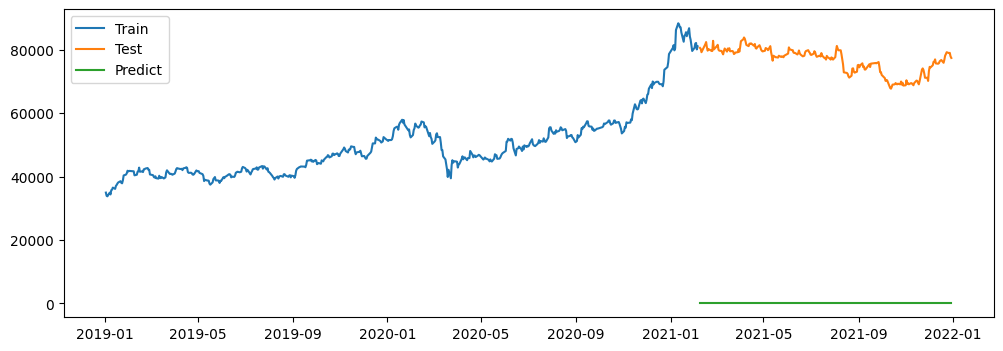

In [23]:
fig, axes = plt.subplots(figsize=(12,4))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(y_predict, label='Predict')
plt.legend()
plt.show()

In [24]:
model = pm.arima.auto_arima(y_train,
             d = 1,
             start_p=0,
             max_p=3,
             start_q=0,
             max_q=3,
             seasonal=False,
             stepwise=True,
             trace=True
             )
    # 1개 시점 예상
predict = model.predict(n_periods=len(y_test))
# predict = pd.DataFrame(predict,index=test.index,columns=['Adj Close'])

#     # 예상 데이터 결합
# a_train = pd.DataFrame(a_train).append(a_predict)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8582.105, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8583.936, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8583.948, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8584.600, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8585.845, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.174 seconds


In [25]:
predict = pd.DataFrame(predict,index=y_test.index,columns=['Adj Close'])

print(pd.concat([y_test,predict],axis=1))

               Adj Close      Adj Close
Date                                   
2021-02-08  80599.234375   81173.863115
2021-02-09  80307.914062   81262.952793
2021-02-10  79239.734375   81352.042471
2021-02-15  81764.523438   81441.132149
2021-02-16  82444.281250   81530.221827
...                  ...            ...
2021-12-24  79241.460938  100595.412886
2021-12-27  78946.156250  100684.502564
2021-12-28  79044.585938  100773.592242
2021-12-29  77918.328125  100862.681920
2021-12-30  77423.929688  100951.771597

[223 rows x 2 columns]


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5528
Model:               SARIMAX(0, 1, 1)   Log Likelihood              -41685.460
Date:                Sat, 03 Sep 2022   AIC                          83376.921
Time:                        21:05:34   BIC                          83396.773
Sample:                             0   HQIC                         83383.844
                               - 5528                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     12.6631      6.547      1.934      0.053      -0.169      25.495
ma.L1          0.0464      0.006      8.015      0.000       0.035       0.058
sigma2      2.083e+05   1424.630    146.246      0.0

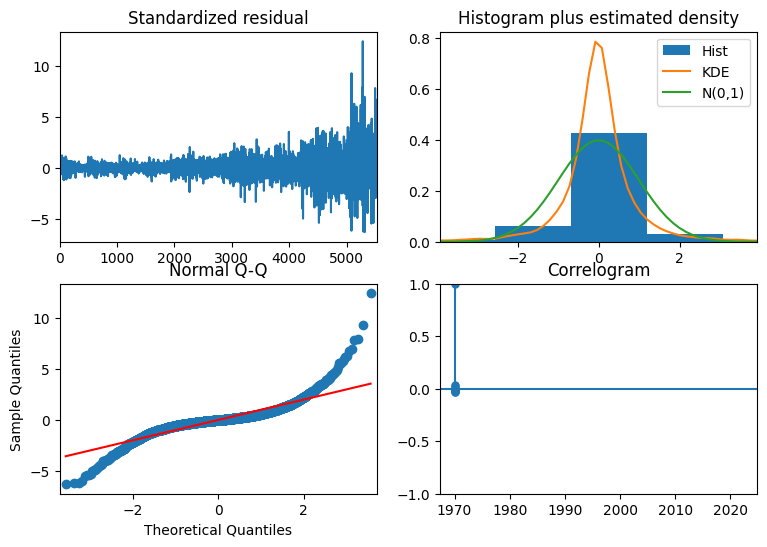

array([77415.51250956, 77428.1756054 , 77440.83870124, 77453.50179708,
       77466.16489292, 77478.82798876, 77491.49108461, 77504.15418045,
       77516.81727629, 77529.48037213])

In [26]:
model = pm.arima.ARIMA(order = (0,1,1))
log_whole_samsung
model.fit(pd.DataFrame(samsung_whole_index))
print(model.summary())
model.plot_diagnostics()
pred = model.predict(n_periods=len(samsung_now_index))

plt.plot(pd.DataFrame(pred,columns=['Adj Close'],index=samsung_now_index.index))
plt.show()
model.predict(start=samsung_now_index.index[0],end=samsung_now_index.index[57])

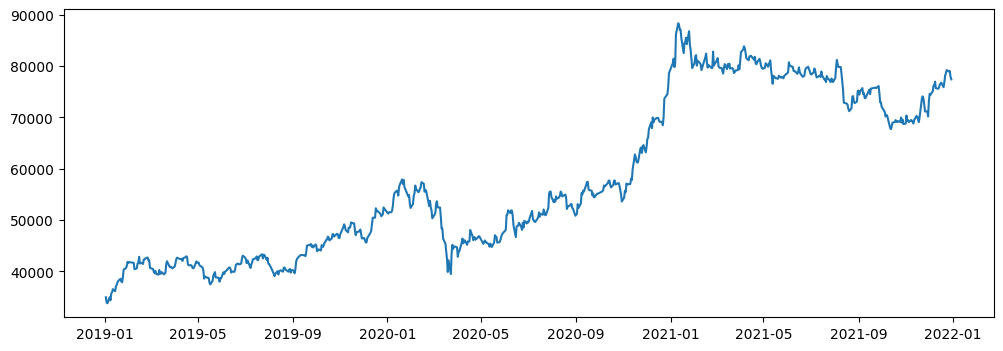

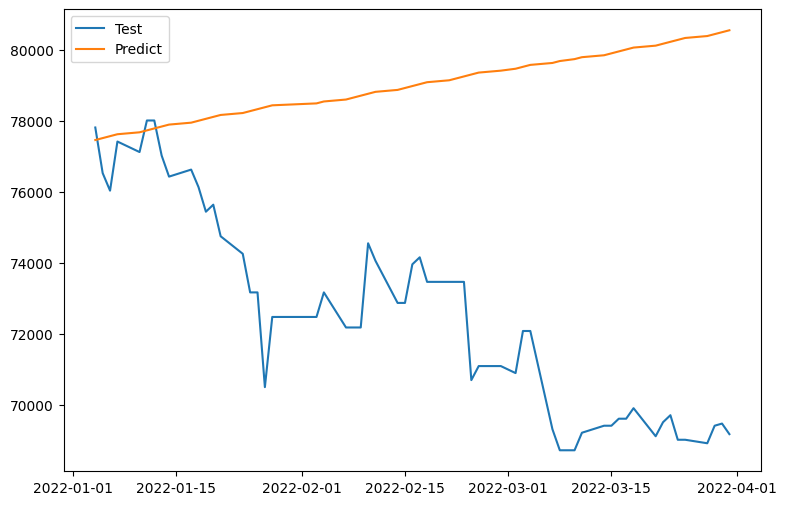

54962719.20534906

In [27]:
from sklearn.metrics import mean_squared_error

train_normal = samsung_whole_index
train_covid = samsung_corona_index
test = samsung_now_index


# 어떤 모델을 만들거니?
train= train_covid
train_df = pd.DataFrame(train)

for i in range(len(test.index)):
    model = pm.arima.ARIMA(order = (0,1,1))
    model.fit(train_df)

    # 1개 시점 예상
    predict = model.predict(n_periods=1)
    predict = pd.DataFrame(predict,index=test.index[i:i+1],columns=['Adj Close'])

#     # 예상 데이터 결합
    train_df = pd.concat([train_df,predict],axis=0)

    
fig, axes = plt.subplots(figsize=(12,4))
plt.plot(train_covid, label='Train')
plt.show()
plt.plot(test, label='Test')
plt.plot(train_df['2022-01-04':], label='Predict')
plt.legend()
plt.show()

train_df
mean_squared_error(test,train_df['2022-01-04':])

In [28]:
train_normal = samsung_whole_index
train= train_normal
test = samsung_now_index

model = pm.arima.ARIMA(order = (0,1,1))
model.fit(pd.DataFrame(train))

    # 1개 시점 예상
predict = model.predict(n_periods=1)
predict = pd.DataFrame(predict,index=test.index[0:1],columns=['Adj Close'])

#     # 예상 데이터 결합
# train = pd.concat(train,predict)
train = pd.DataFrame(train)
predict.index
# predict.reset_index()
print(pd.concat([train,predict],axis=1))


               Adj Close    Adj Close
Date                                 
2000-01-04   4623.465820          NaN
2000-01-05   4222.413574          NaN
2000-01-06   4252.681152          NaN
2000-01-07   4192.146973          NaN
2000-01-10   4366.187988          NaN
...                  ...          ...
2021-12-27  78946.148438          NaN
2021-12-28  79044.585938          NaN
2021-12-29  77918.328125          NaN
2021-12-30  77423.929688          NaN
2022-01-04           NaN  77415.51251

[5529 rows x 2 columns]


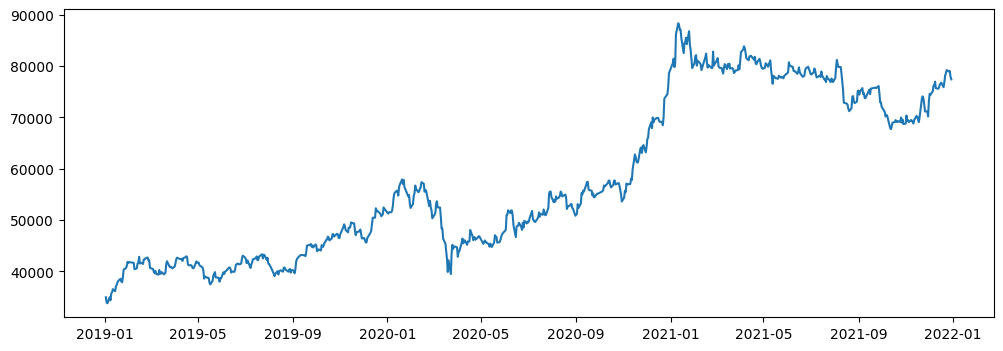

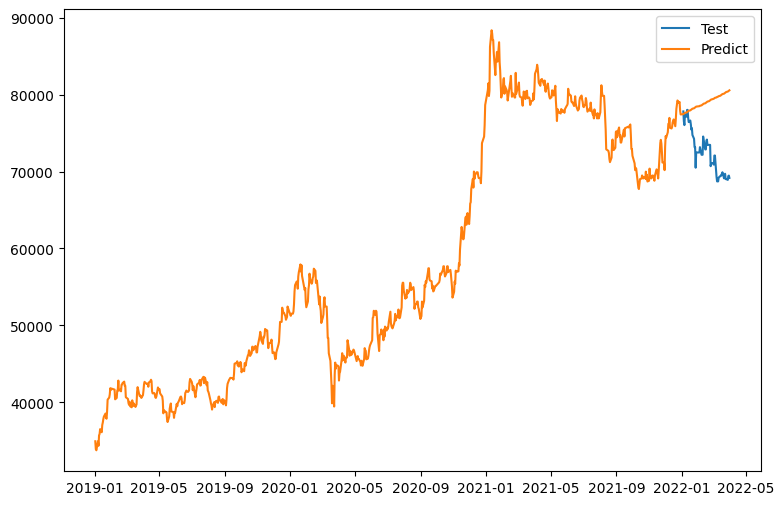

,Adj Close
Date,
2019-01-02,34936.320312
2019-01-03,33899.496094
2019-01-04,33764.261719
2019-01-07,34936.320312
2019-01-08,34350.281250
...,...
2022-03-25,80342.765694
2022-03-28,80396.935072
2022-03-29,80451.100805


In [29]:
train_normal = samsung_whole_index
train_covid = samsung_corona_index
test = samsung_now_index


# 어떤 모델을 만들거니?
train= train_covid
train_df = pd.DataFrame(train)

for i in range(len(test.index)):
    model = pm.arima.ARIMA(order = (0,1,1))
    model.fit(train_df)


    # 1개 시점 예상
    predict = model.predict(n_periods=1)

    predict = pd.DataFrame(predict,columns=['Adj Close'],index=test.index[i:i+1])

#     # 예상 데이터 결합
    train_df = pd.concat([train_df,predict],axis=0)

    
fig, axes = plt.subplots(figsize=(12,4))
plt.plot(train_covid, label='Train')
plt.show()

plt.plot(test, label='Test')
plt.plot(train_df, label='Predict')
plt.legend()
plt.show()

train_df

In [30]:
pd.concat([train_df,pd.DataFrame(test)],axis=1).tail(50)


,Adj Close,Adj Close
Date,,
2022-01-14,77901.289015,76435.117188
2022-01-17,77955.627709,76632.882812
2022-01-18,78009.962524,76138.468750
2022-01-19,78064.293464,75446.304688
2022-01-20,78118.620536,75644.062500
2022-01-21,78172.943745,74754.140625
2022-01-24,78227.263096,74259.734375
2022-01-25,78281.578595,73172.039062
2022-01-26,78335.890247,73172.039062


In [31]:
y_train = samsung_corona_index[:int(0.7*len(samsung_corona_index))]
y_test = samsung_corona_index[int(0.7*len(samsung_corona_index)):]

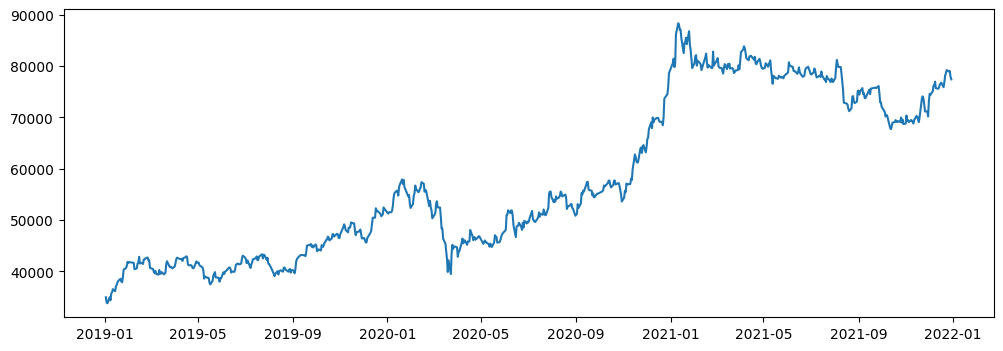

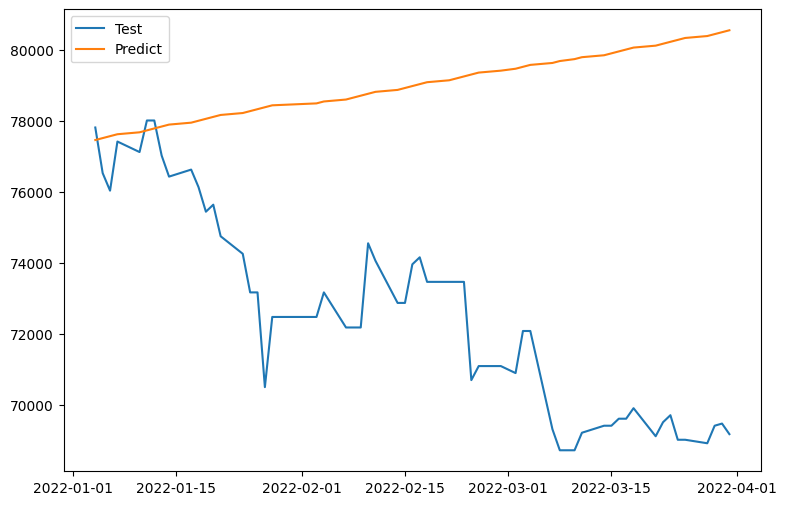

54962719.20534906

In [32]:
from sklearn.metrics import mean_squared_error

train_normal = samsung_whole_index
train_covid = samsung_corona_index
test = samsung_now_index


# 어떤 모델을 만들거니?
train= train_covid
train_df = pd.DataFrame(train)

for i in range(len(test.index)):
    model = pm.arima.ARIMA(order = (0,1,1))
    model.fit(train_df)

    # 1개 시점 예상
    predict = model.predict(n_periods=1)
    predict = pd.DataFrame(predict,index=test.index[i:i+1],columns=['Adj Close'])

#     # 예상 데이터 결합
    train_df = pd.concat([train_df,predict],axis=0)

    
fig, axes = plt.subplots(figsize=(12,4))
plt.plot(train_covid, label='Train')
plt.show()
plt.plot(test, label='Test')
plt.plot(train_df['2022-01-04':], label='Predict')
plt.legend()
plt.show()

train_df
mean_squared_error(test,train_df['2022-01-04':])

In [33]:
model = pm.arima.ARIMA(order = (0,1,1))
model.fit(train_df)


def forcast_one_step():
    fc, conf_int = model.predict(n_periods=1, return_conf_int=True)
    return (fc.tolist()[0], np.asarray(conf_int).tolist()[0])

forcast_one_step()

(80613.5761821274, [78830.78673892301, 82396.3656253318])

In [34]:
train_normal = samsung_whole_index
train_covid = samsung_corona_index
test = samsung_now_index

In [35]:
forcast_list = []
y_pred = []
pred_upper = []
pred_lower = []

for i in y_test:
    fc, conf = forcast_one_step()
    y_pred.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])
    
    model.update(i)

c:\Users\junebae\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\junebae\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\junebae\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\junebae\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood o

In [36]:
pd.DataFrame({'test':y_test, 'pred':y_pred})

,test,pred
Date,,
2021-02-08,80599.234375,80613.576182
2021-02-09,80307.914062,80653.044954
2021-02-10,79239.734375,80353.786625
2021-02-15,81764.523438,79266.692443
2021-02-16,82444.281250,81872.175074
...,...,...
2021-12-24,79241.460938,78714.037430
2021-12-27,78946.156250,79308.221038
2021-12-28,79044.585938,78987.328323


In [37]:
import plotly.graph_objects as go

# trian, test, predict, 신뢰구간
fig = go.Figure([go.Scatter(x=y_train.index, y=y_train, name='Train', mode='lines', line=dict(color='royalblue')),
go.Scatter(x=y_test.index, y=y_test, name='Test', mode='lines', line=dict(color='rgba(0,0,30,0.5)')), 
go.Scatter(x=y_test.index, y=y_pred, name='Test', mode='lines', line=dict(color='red', dash='dot', width=3)),
go.Scatter(x=y_test.index.tolist()+y_test.index[::-1].tolist(), y=pred_upper+pred_lower[::-1], name='Trace3', fill='toself', fillcolor='rgba(0,0,30,0.1)', line={'color':'rgba(0,0,0,0)'}, hoverinfo='skip', showlegend=True)])

fig.update_layout(height=400, width=1000, title_text='ARIMA(0,1,1)')
fig.show()